# dynamo

In [12]:
import scanpy as sc
import numpy as np
import pandas as pd

In [34]:
imp_adata = sc.read("/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/gimvigat_mb_all600.h5ad")

In [13]:
import dynamo as dyn
dyn.get_all_dependencies_version()

package umap-learn typing-extensions    tqdm statsmodels setuptools  \
version      0.5.3             4.6.0  4.65.0      0.14.0     59.5.0   

package session-info seaborn   scipy scikit-learn python-igraph pynndescent  \
version        1.0.0  0.12.2  1.10.1        1.2.2        0.10.6       0.5.8   

package pre-commit pandas openpyxl   numpy numdifftools   numba networkx  \
version      3.5.0  1.3.5    3.1.2  1.21.1       0.9.41  0.55.1      3.1   

package matplotlib loompy get-version dynamo-release colorcet anndata  
version      3.7.1  3.0.7       3.5.4          1.3.2    3.0.1   0.9.1

In [14]:
import dynamo as dyn

In [37]:
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks
dyn.configuration.set_figure_params('dynamo', background='black') # presentation
dyn.configuration.set_pub_style() # manuscript

In [38]:
# pip install cairocffi

In [39]:
from dynamo.preprocessing import Preprocessor
preprocessor = Preprocessor()

In [40]:
preprocessor.preprocess_adata(imp_adata)

|-----> Running monocle preprocessing pipeline...
|-----------> filtered out 0 outlier cells
|-----------> filtered out 1261 outlier genes
|-----> PCA dimension reduction
|-----> <insert> X_pca to obsm in AnnData Object.
|-----> [Preprocessor-monocle] completed [7.8382s]


In [ ]:
dyn.tl.dynamics(imp_adata)

|-----> dynamics_del_2nd_moments_key is None. Using default value from DynamoAdataConfig: dynamics_del_2nd_moments_key=False
|-----------> removing existing M layers:[]...
|-----------> making adata smooth...
|-----> calculating first/second moments...


In [ ]:
dyn.tl.moments(imp_adata)

In [ ]:
imp_adata.obs['Class']

In [ ]:
dyn.tl.gene_wise_confidence(imp_adata, group='Class', lineage_dict={'Blood': ['terminal_cell_state']})

In [ ]:
dyn.tl.reduceDimension(imp_adata)

In [ ]:
dyn.tl.reduceDimension(imp_adata, basis='umap', enforce=True)

In [ ]:
adata = imp_adata

In [ ]:
dyn.tl.cell_velocities(adata)

In [ ]:
dyn.tl.cell_velocities(adata)

In [ ]:
dyn.tl.cell_wise_confidence(adata)

In [ ]:
dyn.vf.VectorField(adata, layers='X_pca')

In [ ]:
dyn.vf.topography(adata, basis='umap')

In [ ]:
dyn.ext.ddhodge(adata)

In [ ]:
dyn.vf.Potential(adata)

In [ ]:
dyn.pl.cell_wise_vectors(adata, color=colors, ncols=3)
dyn.pl.grid_vectors(adata, color=colors, ncols=3)
dyn.pl.streamline_plot(adata, color=colors, ncols=3)
dyn.pl.line_integral_conv(adata)

In [ ]:
dyn.vf.VectorField(adata, basis='umap')
dyn.pl.topography(adata)

In [ ]:
import matplotlib.pyplot as plt
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(12, 10))
f1_axes
f1_axes[0, 0] = dyn.pl.cell_wise_vectors(adata, color='umap_ddhodge_potential', pointsize=0.1, alpha = 0.7, ax=f1_axes[0, 0], quiver_length=6, quiver_size=6, save_show_or_return='return')
f1_axes[0, 1] = dyn.pl.grid_vectors(adata, color='speed_umap', ax=f1_axes[0, 1], quiver_length=12, quiver_size=12, save_show_or_return='return')
f1_axes[1, 0] = dyn.pl.streamline_plot(adata, color='divergence_pca', ax=f1_axes[1, 0], save_show_or_return='return')
f1_axes[1, 1] = dyn.pl.topography(adata, color='acceleration_umap', ax=f1_axes[1, 1], save_show_or_return='return')
plt.show()

In [15]:
%matplotlib inline

In [16]:
import scanpy as sc
import numpy as np
import pandas as pd

In [17]:
import scvelo as scv

In [18]:

# load preprocessed scRNA-seq and spatial datasets
RNA_PATH = "/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/RNA_adata.h5ad"
ST_PATH = "/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/HybISS_adata.h5ad"
RNA = scv.read(RNA_PATH)
HybISS = scv.read(ST_PATH)
RNA, HybISS

(AnnData object with n_obs × n_vars = 40733 × 16907
     obs: 'CellID', 'Age', 'Region', 'Tissue', 'Class', 'Subclass', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts'
     var: 'GeneName', 'gene_count_corr'
     layers: 'spliced', 'unspliced',
 AnnData object with n_obs × n_vars = 4628 × 119
     obs: 'n_counts'
     var: 'GeneName'
     obsm: 'X_xy_loc', 'xy_loc')

In [33]:
imp_adata = sc.read("/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/gimvigat_mb_all600.h5ad")
# imp_adata = sc.read("/gpfs/gibbs/pi/zhao/tl688/seqfishdata/data/Mouse_brain/HybISS_transpaimpute.h5ad")

In [34]:
imp_adata.obsm['X_spatial'] = HybISS.obsm['X_xy_loc']

In [35]:
import dynamo as dyn
dyn.get_all_dependencies_version()

package umap-learn typing-extensions    tqdm statsmodels setuptools  \
version      0.5.3             4.6.0  4.65.0      0.14.0     59.5.0   

package session-info seaborn   scipy scikit-learn python-igraph pynndescent  \
version        1.0.0  0.12.2  1.10.1        1.2.2        0.10.6       0.5.8   

package pre-commit pandas openpyxl   numpy numdifftools   numba networkx  \
version      3.5.0  1.3.5    3.1.2  1.21.1       0.9.41  0.55.1      3.1   

package matplotlib loompy get-version dynamo-release colorcet anndata  
version      3.7.1  3.0.7       3.5.4          1.3.2    3.0.1   0.9.1

In [36]:
adata = imp_adata 

In [37]:
adata

AnnData object with n_obs × n_vars = 4628 × 16907
    obs: 'n_counts', 'Class', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    var: 'GeneName', 'gene_count_corr'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta', 'X_spatial'
    layers: 'spliced', 'unspliced'

In [38]:
adata = adata[[True if i in ["Ectoderm", "Neural crest", "Neuroblast", "Neural tube", "Neuron"] else False for i in adata.obs['Class']]]

In [39]:
adata

View of AnnData object with n_obs × n_vars = 2591 × 16907
    obs: 'n_counts', 'Class', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    var: 'GeneName', 'gene_count_corr'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta', 'X_spatial'
    layers: 'spliced', 'unspliced'

In [40]:
dyn.pp.recipe_monocle(adata, n_top_genes=4000, fg_kwargs={"shared_count": 20})
dyn.tl.dynamics(adata, model="stochastic")
dyn.tl.reduceDimension(adata, n_pca_components=30)
dyn.tl.cell_velocities(adata, method="pearson", other_kernels_dict={"transform": "sqrt"})

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|----- no mitochondria genes detected; looks like your var_names may be corrupted (i.e. include nan values). If you don't believe so, please report to us on github or via xqiu@wi.mit.edu
Traceback (most recent call last):
  File "/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.g

estimating gamma: 100%|██████████| 4000/4000 [06:54<00:00,  9.66it/s]


|-----> retrieve data for non-linear dimension reduction...
|-----> [UMAP] using X_pca with n_pca_components = 30
|-----> <insert> X_umap to obsm in AnnData Object.
|-----> [UMAP] completed [22.4176s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [calculating transition matrix via pearson kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via pearson kernel with sqrt transform.] completed [1.4759s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding]

AnnData object with n_obs × n_vars = 2591 × 16907
    obs: 'n_counts', 'Class', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x', 'nGenes', 'nCounts', 'pass_basic_filter', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'GeneName', 'gene_count_corr', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta', 'X_spatial', 'X_pca', 'X', 'cell_cycle_sc

In [41]:
dyn.tl.cell_velocities(adata, basis="pca")
dyn.vf.VectorField(adata, basis="pca", pot_curl_div=True)

|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.6701s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.0587s]
|-----> Running ddhodge to estimate vector field based pse

Calculating divergence: 100%|██████████| 3/3 [00:00<00:00, 16.31it/s]


|-----> [VectorField] completed [12.8982s]


|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis spatial. dimension reduction spatial will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [SPATIAL] completed [0.0906s]
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress:

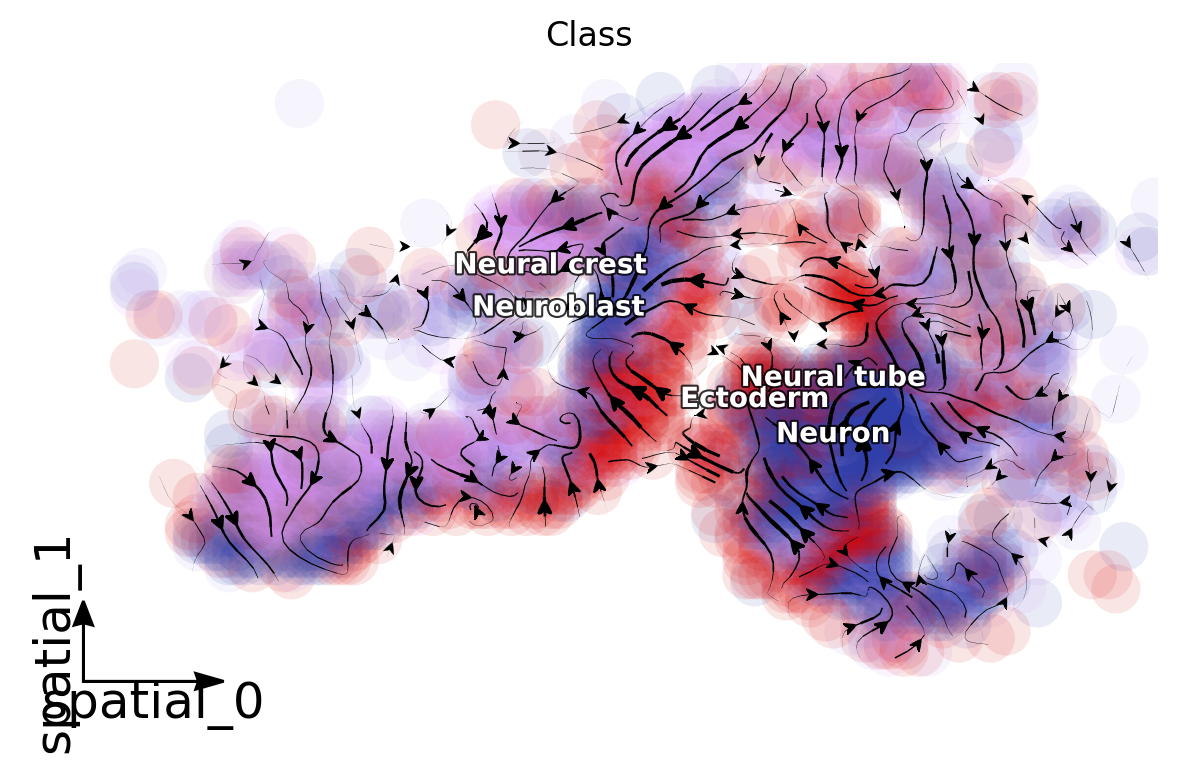

In [42]:
dyn.pl.streamline_plot(adata, color=["Class"], basis="spatial", show_legend="on data", show_arrowed_spines=True)

|-----> X shape: (2591, 2) V shape: (2591, 2)
|-----------> plotting with basis key=X_spatial
|-----------> skip filtering Class by stack threshold when stacking color because it is not a numeric type


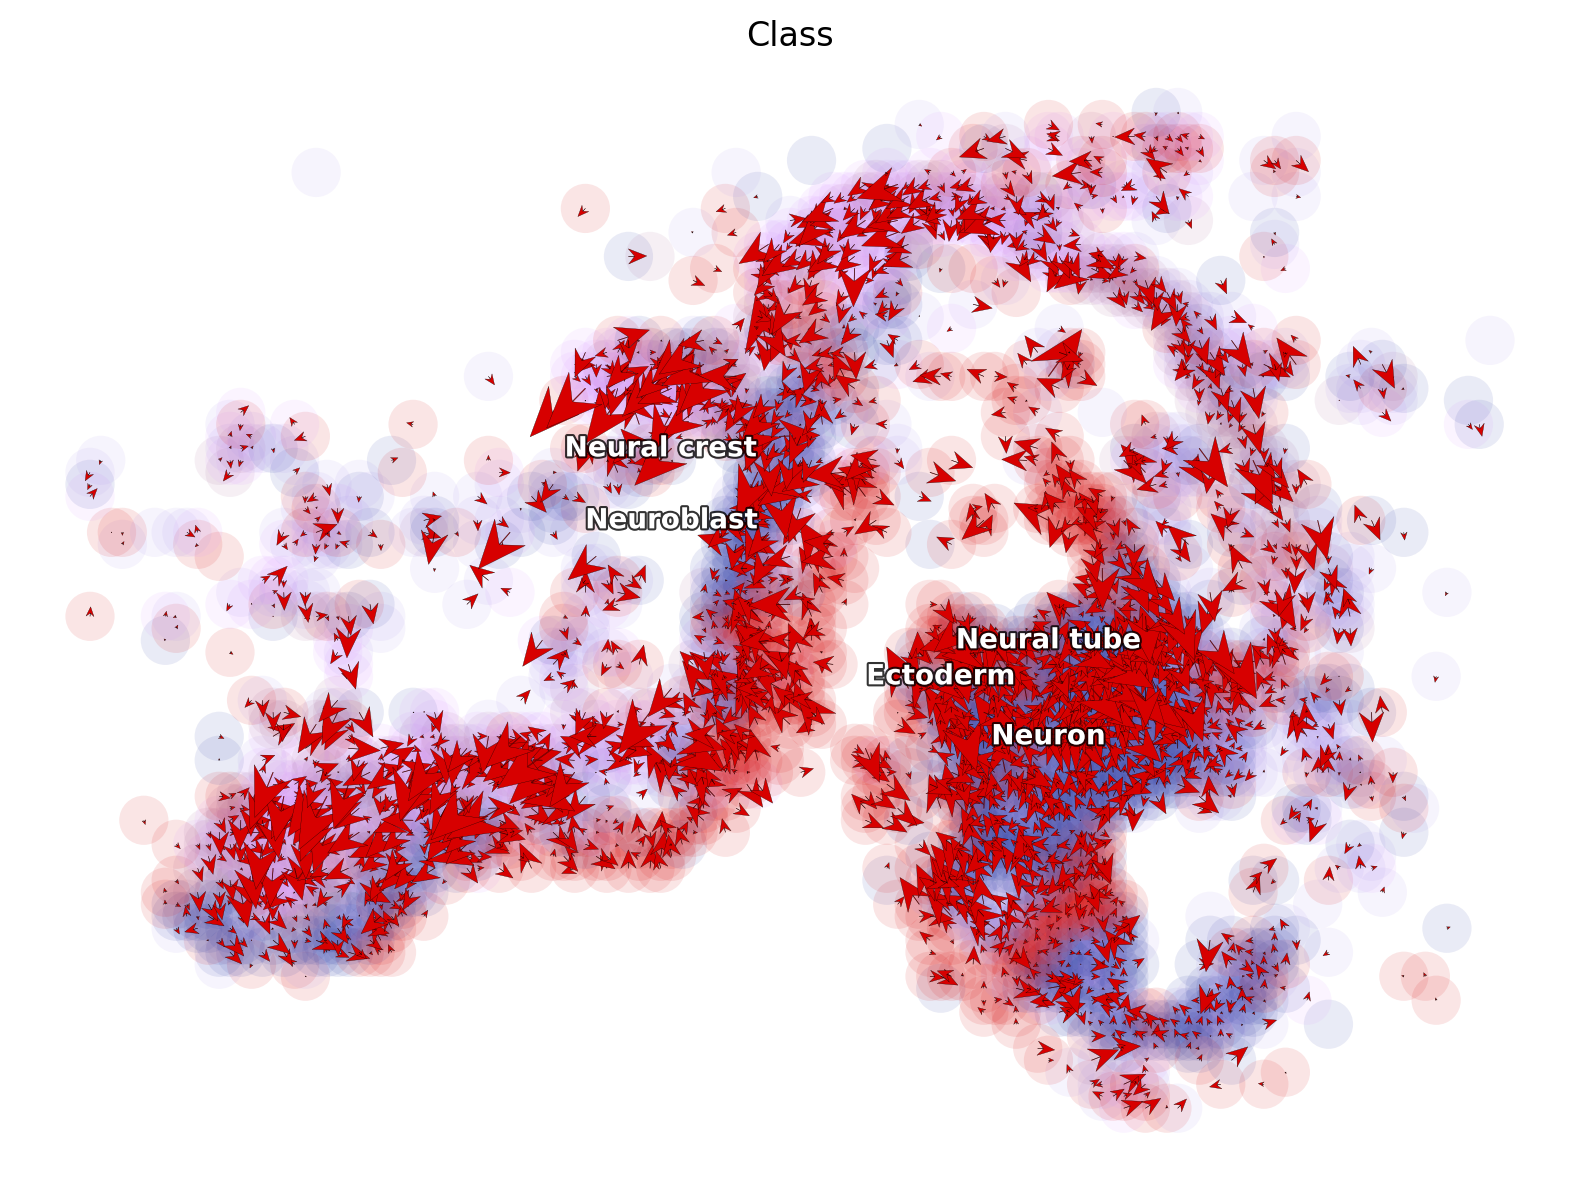

In [43]:
dyn.pl.cell_wise_vectors(
    adata,
    color=["Class"],
    basis="spatial",
    show_legend="on data",
    quiver_length=6,
    quiver_size=6,
    figsize=(8, 6),
    show_arrowed_spines=False,
)


In [44]:
# dyn.tl.cell_velocities(adata, basis="pca")
dyn.vf.VectorField(adata, basis="spatial", pot_curl_div=True)

dyn.vf.speed(adata, basis="spatial")
dyn.vf.divergence(adata, basis="spatial")
dyn.vf.acceleration(adata, basis="spatial")
dyn.vf.curl(adata, basis="spatial")


|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: SPATIAL. 
        Vector field will be learned in the SPATIAL space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.1500s]
|-----------> current cosine correlation between input velocities and learned velocities is less than 0.6. Make a 1-th vector field reconstruction trial.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.1373s]
|-----------> current cosine correlation between input velocities and learned velocities is less than 0.6. Make a 2-th vector field reconstruction trial.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.138

Calculating 2-D curl: 100%|██████████| 2591/2591 [00:00<00:00, 30621.91it/s]

|-----> Computing divergence...



Calculating divergence: 100%|██████████| 3/3 [00:00<00:00, 39.82it/s]


|-----> [VectorField] completed [13.2404s]


Calculating divergence: 100%|██████████| 3/3 [00:00<00:00, 38.85it/s]

|-----> [Calculating acceleration] in progress: 1.0035%

|-----> [Calculating acceleration] in progress: 100.0000%|-----> [Calculating acceleration] completed [0.1198s]


Calculating 2-D curl: 100%|██████████| 2591/2591 [00:00<00:00, 23684.65it/s]


In [49]:
adata_new = adata[[True if i in ["Neural crest", "Neuroblast", "Neural tube", "Neuron"] else False for i in adata.obs['Class']]]

|-----> Estimating the transition probability between cell types...
|-----> Applying vector field
|-----> [KDTree parameter preparation computation] in progress: 0.0000%|-----> [KDTree computation] completed [0.0004s]
|-----> [iterate groups] in progress: 25.0000%

uniformly sampling points along a trajectory: 100%|██████████| 100/100 [00:00<00:00, 226.66it/s]


|-----> [iterate groups] in progress: 50.0000%

uniformly sampling points along a trajectory: 100%|██████████| 100/100 [00:00<00:00, 227.81it/s]


|-----> [iterate groups] in progress: 75.0000%

uniformly sampling points along a trajectory: 100%|██████████| 100/100 [00:00<00:00, 242.86it/s]


|-----> [iterate groups] in progress: 100.0000%

uniformly sampling points along a trajectory: 100%|██████████| 100/100 [00:00<00:00, 248.69it/s]


|-----> [iterate groups] completed [101.7292s]
|-----> [State graph estimation] completed [0.0023s]
|-----------> plotting with basis key=X_spatial
|-----------> skip filtering Class by stack threshold when stacking color because it is not a numeric type


<Figure size 600x400 with 0 Axes>

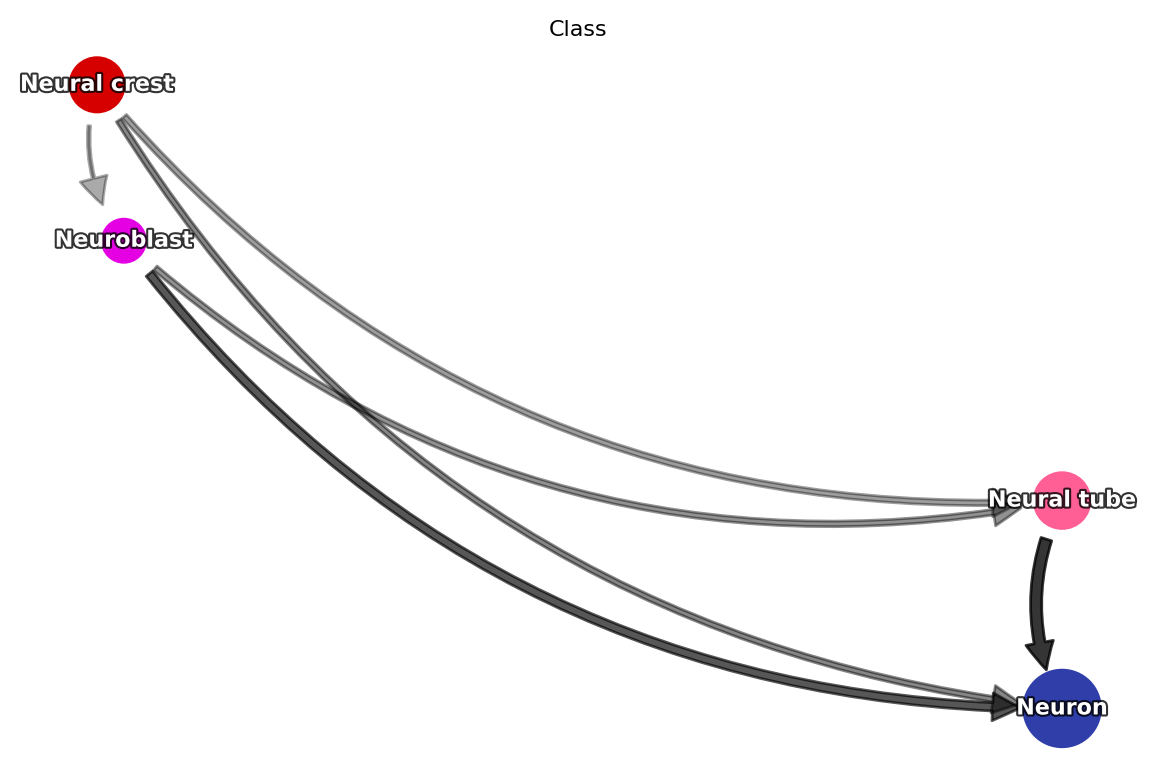

In [50]:
dyn.configuration.set_figure_params("dynamo", background="white")
dyn.pd.state_graph(adata_new , group='Class', basis='spatial', method='vf')
dyn.pl.state_graph(adata_new ,
                   color=['Class'],
                   group='Class',
                   basis='spatial',
                   show_legend='on data',
                   method='vf');

In [46]:
["Ectoderm", "Neural crest", "Neuroblast", "Neural tube", "Neuron"]

['Ectoderm', 'Neural crest', 'Neuroblast', 'Neural tube', 'Neuron']

In [ ]:
'Gata1' in adata.var_names

In [80]:
adata_labeling = adata

In [100]:
dyn.pp.recipe_monocle(adata, n_top_genes=4000, fg_kwargs={"shared_count": 20})
dyn.tl.dynamics(adata, model="stochastic")
dyn.tl.reduceDimension(adata, n_pca_components=30)
dyn.tl.cell_velocities(adata, method="pearson", other_kernels_dict={"transform": "sqrt"})
dyn.tl.cell_velocities(adata, basis="pca")

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|----- no mitochondria genes detected; looks like your var_names may be corrupted (i.e. include nan values). If you don't believe so, please report to us on github or via xqiu@wi.mit.edu
Traceback (most recent call last):
  File "/gpfs/gibbs/project/zhao/tl688/conda_envs/scgpt/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3361, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 76, in pandas._libs.index.IndexEngine.g

estimating gamma: 100%|██████████| 4000/4000 [08:16<00:00,  8.05it/s]


|-----> retrieve data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [UMAP] completed [0.0044s]
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.1006s]
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|--

AnnData object with n_obs × n_vars = 4628 × 16907
    obs: 'n_counts', 'Class', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x', 'nGenes', 'nCounts', 'pass_basic_filter', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'cell_cycle_phase', 'spatial_ddhodge_div', 'spatial_ddhodge_potential', 'curl_spatial', 'divergence_spatial', 'control_point_spatial', 'inlier_prob_spatial', 'obs_vf_angle_spatial', 'speed_spatial', 'acceleration_spatial', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'GeneName', 'gene_count_corr', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition', 'use_for_pca'
    uns: 'pp', 'veloc

In [103]:
dyn.vf.VectorField(adata, basis="pca", pot_curl_div=True)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.7325s]
|-----> Running ddhodge to estimate vector field based pseudotime in pca basis...
|-----> graphizing vectorfield...
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----------? nbrs_idx argument is ignored and recomputed because nbrs_idx is not None and return_nbrs=True
|-----------> calculating neighbor indices...
|-----------> not a

Calculating divergence: 100%|██████████| 5/5 [00:00<00:00, 10.65it/s]


|-----> [VectorField] completed [54.2377s]


|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....


calculating Jacobian for each cell: 100%|██████████| 4628/4628 [00:00<00:00, 184013.72it/s]


|-----> project the pca perturbation vector to low dimensional space....
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.0569s]
|-----> you can use dyn.pl.streamline_plot(adata, basis='umap_perturbation') to visualize the perturbation vector
|-----------> plotting with basis key=X_umap_perturbation
|-----------> skip filtering Class by stack threshold when stacking color because it is not a numeric type


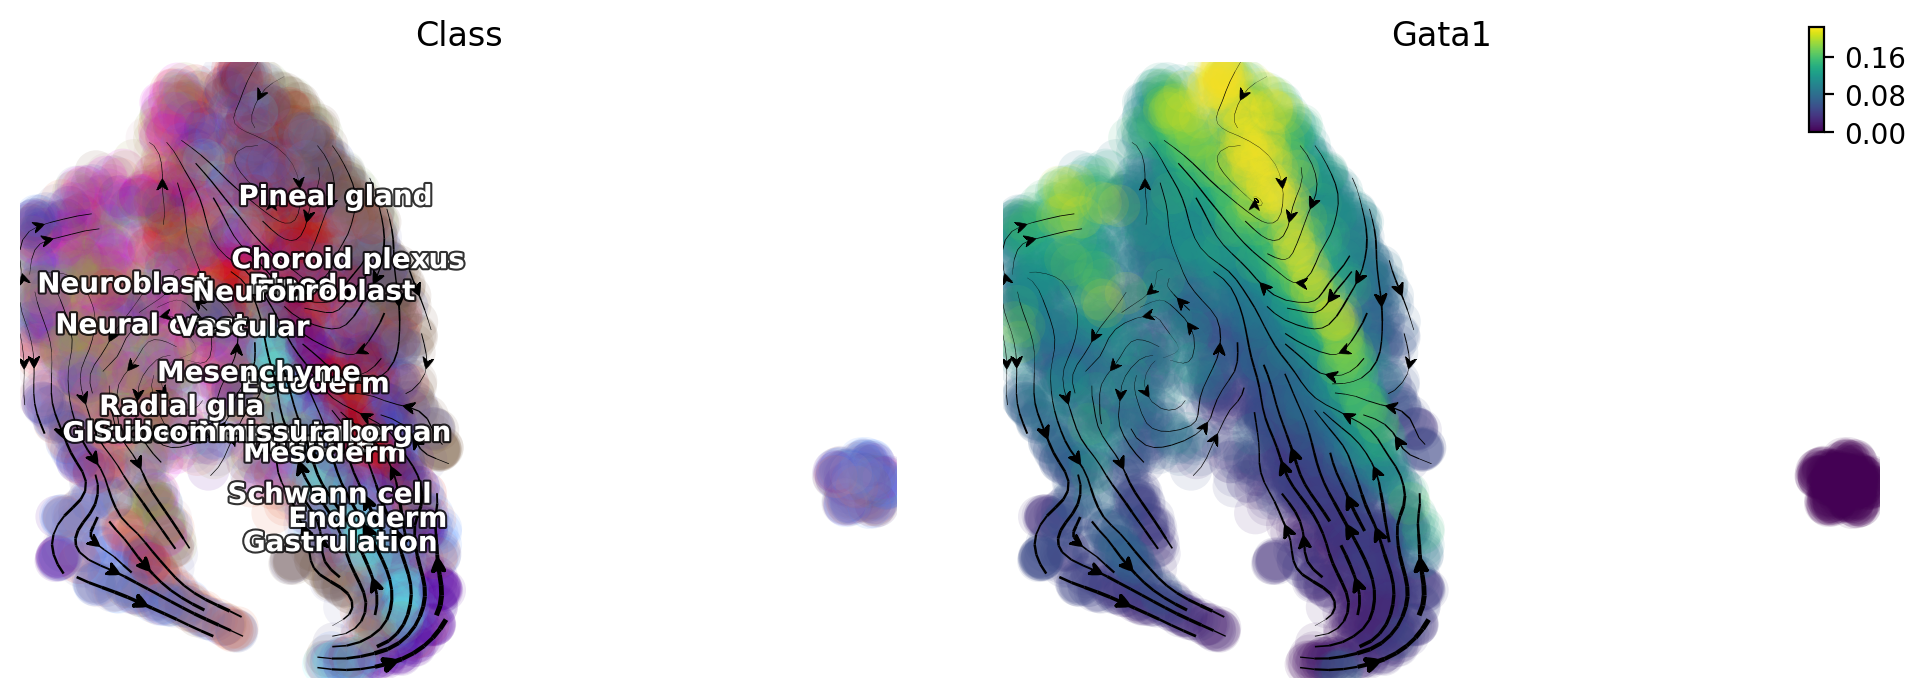

In [104]:
gene = "Gata1"
dyn.pd.perturbation(adata, gene, [-100], emb_basis="umap")
dyn.pl.streamline_plot(adata, color=["Class", gene], basis="umap_perturbation")

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.0480s]
|-----> you can use dyn.pl.streamline_plot(adata, basis='spatial_perturbation') to visualize the perturbation vector
|-----------> plotting with basis key=X_spatial

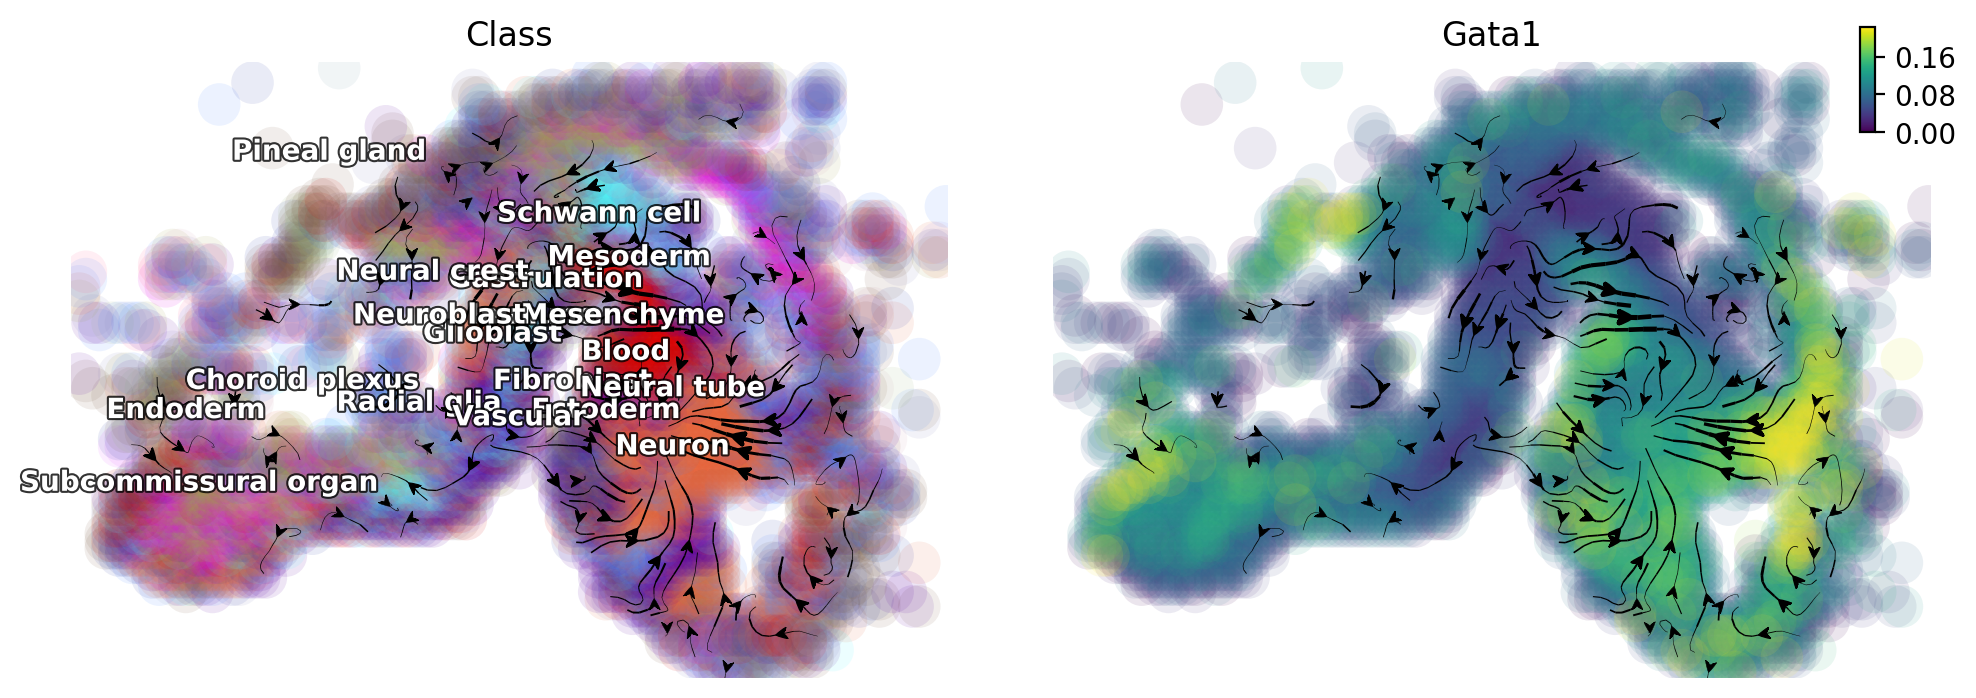

In [105]:
gene = "Gata1"
dyn.pd.perturbation(adata, gene, [-100], emb_basis="spatial")
dyn.pl.streamline_plot(adata, color=["Class", gene], basis="spatial_perturbation")

|-----> In silico perturbation of single-cells and prediction of cell fate after perturbation...
|-----> Retrive X_pca, PCs, pca_mean...
|-----> Calculate perturbation effect matrix via \delta Y = J \dot \delta X....
|-----> project the pca perturbation vector to low dimensional space....
|-----? Some row sums(out degree) in adata's neighbor graph are zero.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [1.0550s]
|-----> you can use dyn.pl.streamline_plot(adata, basis='spatial_perturbation') to visualize the perturbation vector
|-----------> plotting with basis key=X_spatial

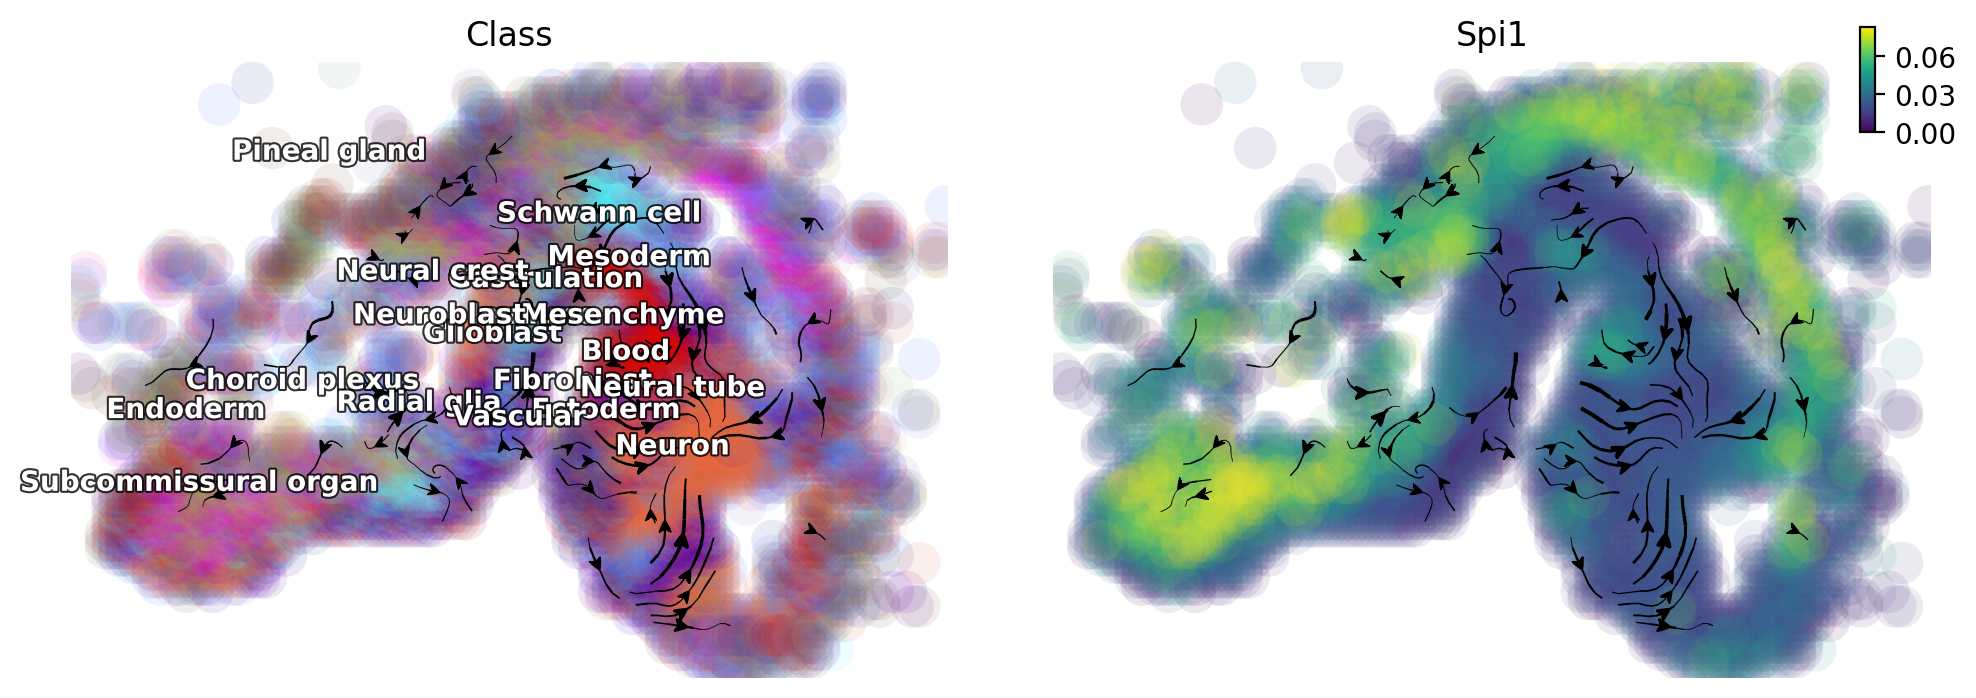

In [108]:
gene = "Spi1"
dyn.pd.perturbation(adata, gene, [-100], emb_basis="spatial")
dyn.pl.streamline_plot(adata, color=["Class", gene], basis="spatial_perturbation")